<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/Logistic_Regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Import dataset

In [ ]:
dataset = pd.read_csv("ex2data1.txt", header=None)
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:, -1].values.reshape(100,1)
X.shape

(100, 2)

Check if there are any null values

In [ ]:
dataset.isnull().sum()

0    0
1    0
2    0
dtype: int64

Visualize the data

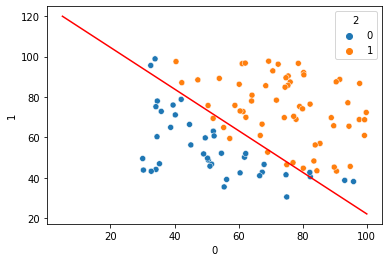

In [ ]:
sns.scatterplot(x=dataset[0], y=dataset[1], hue=dataset[2], data=dataset)
x = np.linspace(5,100,1000)
y = (-22.21660051 + 0.1826898*x)/(-0.17763707)
plt.plot(x, y, '-r')

Accuracy

In [ ]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

Implementation of cost function

In [ ]:
def cost(X, Y, theta):
    temp = Y*np.log(sigmoid(np.dot(X, theta))) + (1-Y)*np.log(1-sigmoid(np.dot(X, theta)))
    temp = temp / 100
    return -temp.sum()

def costFunction(theta, X, y):
    J = (-1/100) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

Initialize params

In [ ]:
ones = np.ones(len(X)).reshape(100,1)
X = np.hstack((ones, X))
theta = np.zeros(3).reshape(3,1)

Test the cost function

In [ ]:
print(cost(X,Y,theta))

0.6931471805599457


Gradient Descent

In [ ]:
def gradient_descent(X, Y, theta, alpha, iteration):
    for i in range(iteration):
        res = gradient(theta, X, Y)
        temp = theta - (alpha*res)
        theta = temp
    print(cost(X, Y, theta))
    print(theta)
    return theta

def calc(X, Y, theta):
    return sigmoid(np.dot(X, theta)) - Y

def gradient(theta, X, y):
    return ((1/100) * X.T @ (sigmoid(X @ theta) - y))


In [ ]:
 theta_optimized=gradient_descent(X, Y, theta, 0.003, 1000000)
# gradient_descent(X, Y, theta, 0.01, 50000)

0.2049307804026723
[[-22.21660051]
 [  0.1826898 ]
 [  0.17763707]]


Plot

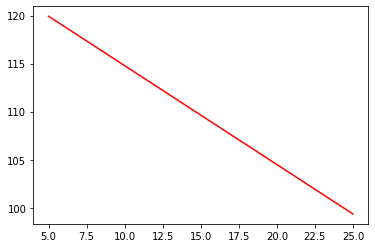

In [ ]:
x = np.linspace(5,25,100)
y = (-22.21660051 + 0.1826898*x)/(-0.17763707)
plt.plot(x, y, '-r')

Accuracy

In [ ]:
def accuracy(X, y, theta, cutoff):
    pred_op = sigmoid(np.dot(X, theta))
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)

print(theta_optimized)
accuracy(X, Y, theta_optimized, 0.5)

[[-22.21660051]
 [  0.1826898 ]
 [  0.17763707]]
89.0
